# ReLU

## mnist_softmax

In [4]:
import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = torchvision.transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = torchvision.transforms.ToTensor(), download = True)
#DataLoader를 dateset으로 바꾸니 됨
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = 100, shuffle = True, drop_last = True)

#MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10 ,bias= True).to(device)

#initialization
torch.nn.init.normal_(linear.weight)

#parameters
training_epochs = 15
batch_size = 100
lr = 0.001

# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr)

#Train
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # Label is not one-hot encoded
        X = X.view(-1,28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
        
    print("Epoch: ", "%04d" % (epoch+1), "cost = ", "{:.9f}".format(avg_cost))

Epoch:  0001 cost =  5.656054974
Epoch:  0002 cost =  1.699803472
Epoch:  0003 cost =  1.121566176
Epoch:  0004 cost =  0.883357942
Epoch:  0005 cost =  0.750486851
Epoch:  0006 cost =  0.663246810
Epoch:  0007 cost =  0.601343870
Epoch:  0008 cost =  0.554267764
Epoch:  0009 cost =  0.518746793
Epoch:  0010 cost =  0.489619613
Epoch:  0011 cost =  0.465846598
Epoch:  0012 cost =  0.446371138
Epoch:  0013 cost =  0.429083288
Epoch:  0014 cost =  0.414352983
Epoch:  0015 cost =  0.401432723


In [6]:
#Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction , 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.8905999660491943


## mnist_nn

In [6]:
import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
mnist_train = dsets.MNIST(root = "MNIST_data/", train = True, transform = torchvision.transforms.ToTensor(), download = True)

mnist_test = dsets.MNIST(root = "MNIST_data/", train = False, transform = torchvision.transforms.ToTensor(), download = True)
#DataLoader를 dateset으로 바꾸니 됨
data_loader = torch.utils.data.DataLoader(dataset = mnist_train, batch_size = 100, shuffle = True, drop_last = True)

#MNIST data image of shape 28 * 28 = 784
linear1 = torch.nn.Linear(784, 256 ,bias= True).to(device)
linear2 = torch.nn.Linear(256, 256 ,bias= True).to(device)
linear3 = torch.nn.Linear(256, 10 ,bias= True).to(device)
relu = torch.nn.ReLU()

#initialization
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

#model
model = torch.nn.Sequential(linear1,relu,linear2,relu,linear3).to(device)

#parameters
training_epochs = 15
batch_size = 100
lr = 0.001

# define cost/Loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr)

#Train
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # Label is not one-hot encoded
        X = X.view(-1,28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
        
    print("Epoch: ", "%04d" % (epoch+1), "cost = ", "{:.9f}".format(avg_cost))

Epoch:  0001 cost =  161.884811401
Epoch:  0002 cost =  40.123458862
Epoch:  0003 cost =  25.175310135
Epoch:  0004 cost =  17.374856949
Epoch:  0005 cost =  12.620373726
Epoch:  0006 cost =  9.206541061
Epoch:  0007 cost =  6.959208965
Epoch:  0008 cost =  5.137670517
Epoch:  0009 cost =  3.848514080
Epoch:  0010 cost =  2.930377483
Epoch:  0011 cost =  2.190249443
Epoch:  0012 cost =  1.748667598
Epoch:  0013 cost =  1.307197332
Epoch:  0014 cost =  1.024014711
Epoch:  0015 cost =  0.904227257


In [7]:
#Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction , 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy: ", accuracy.item())

Accuracy:  0.9483000040054321


Label:  8
Prediction:  8


C:\Users\csw\.conda\envs\deepLearn\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\csw\.conda\envs\deepLearn\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


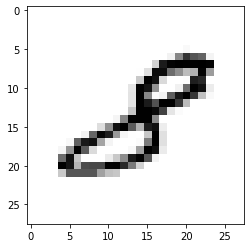

Label:  5
Prediction:  5


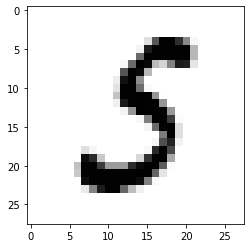

Label:  7
Prediction:  7


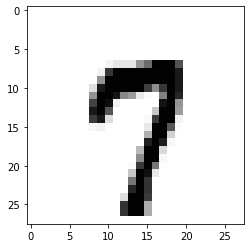

Label:  9
Prediction:  9


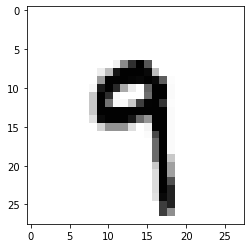

Label:  3
Prediction:  3


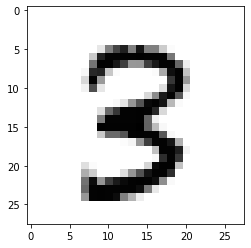

Label:  5
Prediction:  5


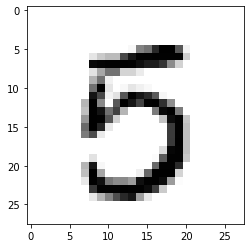

Label:  2
Prediction:  2


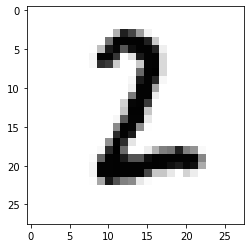

Label:  1
Prediction:  1


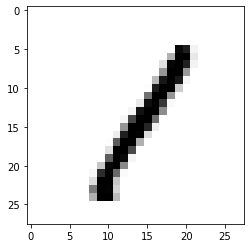

Label:  5
Prediction:  5


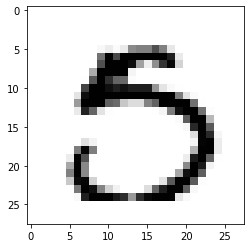

Label:  8
Prediction:  8


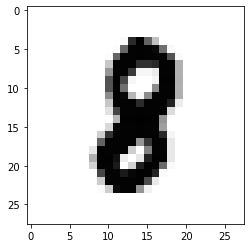

In [8]:
import matplotlib.pyplot as plt
import random
times = 10
for time in range(times):
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print("Label: ", Y_single_data.item())
    single_prediction = model(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction,1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap="Greys", interpolation="nearest")
    plt.show()